## Step 1 - Import data and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data_loc = 'data/loan_data_training.csv'
training_data = pd.read_csv(training_data_loc)

test_data_loc = 'data/loan_data_test.csv'
test_data = pd.read_csv(test_data_loc)

print('%i records in training data set' % len(training_data))
print('%i records in test data set' % len(test_data))

614 records in training data set
367 records in test data set


## Step 2 - Clean data in training set

In [3]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

# print('\n')

# test_data_cols_with_nan_values = test_data.columns[test_data.isna().any()].tolist()
# print('%i columns in test data set have NaN values' % (len(test_data_cols_with_nan_values)))
# print(test_data_cols_with_nan_values)

7 columns in training data set have NaN values
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [5]:
training_data['Gender'] = training_data['Gender'].fillna(training_data.mode()['Gender'][0])
training_data['Married'] = training_data['Married'].fillna(training_data.mode()['Married'][0])
training_data['Dependents'] = training_data['Dependents'].fillna(training_data.mode()['Dependents'][0])
training_data['Self_Employed'] = training_data['Self_Employed'].fillna(training_data.mode()['Self_Employed'][0])
training_data['Loan_Amount_Term'] = training_data['Loan_Amount_Term'].fillna(training_data.mode()['Loan_Amount_Term'][0])
training_data['Credit_History'] = training_data['Credit_History'].fillna(training_data.mode()['Credit_History'][0])
training_data['LoanAmount'] = training_data['LoanAmount'].fillna(training_data['LoanAmount'].median())

In [6]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

0 columns in training data set have NaN values
[]


## Step 3 - Visualise data to uncover patterns

In [7]:
training_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

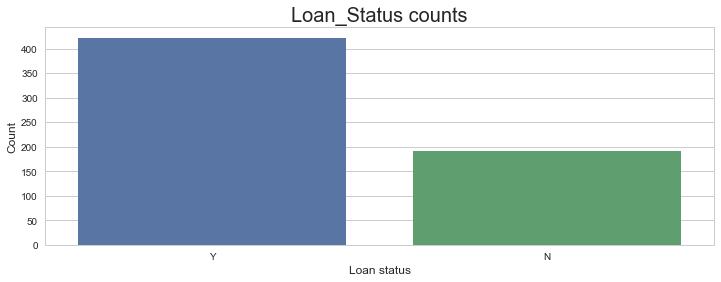

In [8]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Loan_Status', data=training_data)
plt.title('Loan_Status counts', fontsize=20)
plt.xlabel('Loan status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

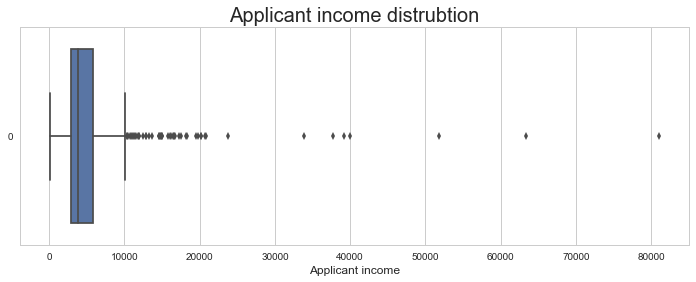

In [9]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(data=training_data['ApplicantIncome'], orient='h')
plt.title('Applicant income distrubtion', fontsize=20)
plt.xlabel('Applicant income', fontsize=12)
plt.show()

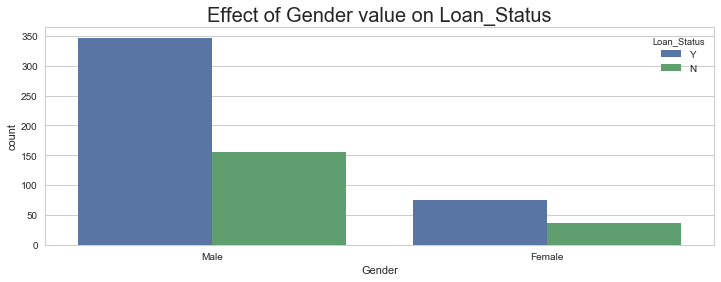

In [10]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Gender', hue='Loan_Status', data=training_data)
plt.title('Effect of Gender value on Loan_Status', fontsize=20)
plt.show()

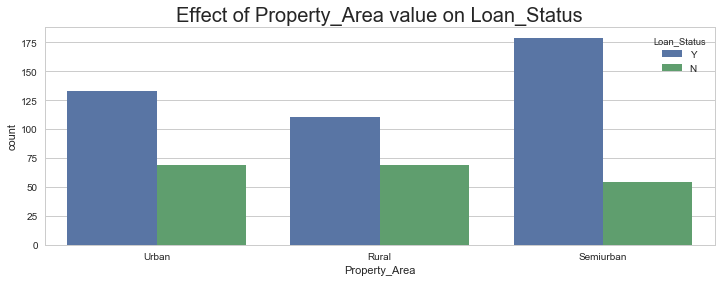

In [11]:
sns.set(style="whitegrid")
fig = plt.subplots(figsize=(12, 4))
ax = sns.countplot(x='Property_Area', hue='Loan_Status', data=training_data)
plt.title('Effect of Property_Area value on Loan_Status', fontsize=20)
plt.show()

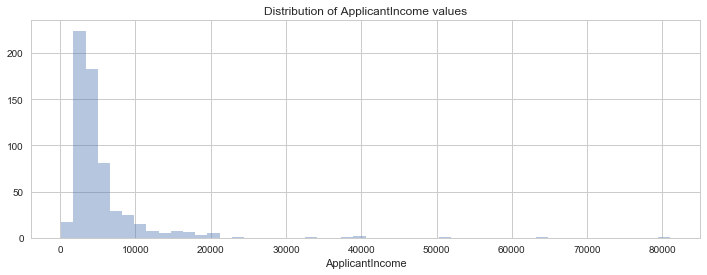

In [12]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(training_data['ApplicantIncome'], kde=False)
plt.title('Distribution of ApplicantIncome values')
plt.show()

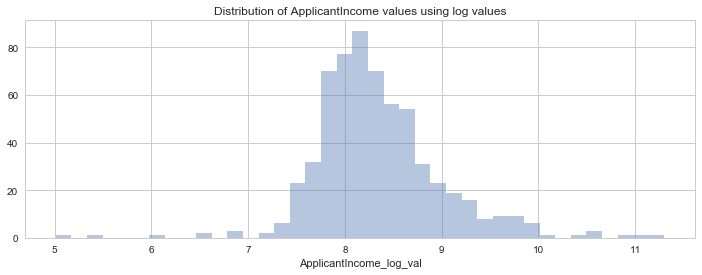

In [13]:
training_data['ApplicantIncome_log_val'] = np.log(training_data['ApplicantIncome'])
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(training_data['ApplicantIncome_log_val'], kde=False)
plt.title('Distribution of ApplicantIncome values using log values')
plt.show()

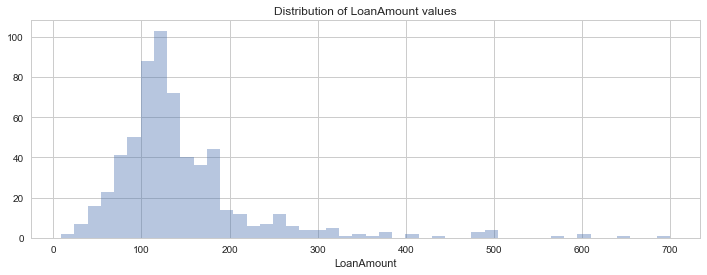

In [14]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(training_data['LoanAmount'], kde=False)
plt.title('Distribution of LoanAmount values')
plt.show()

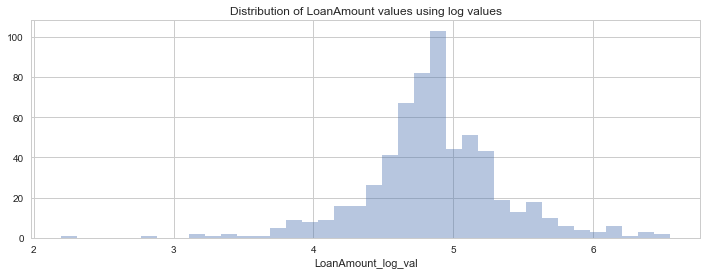

In [15]:
training_data['LoanAmount_log_val'] = np.log(training_data['LoanAmount'])
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(training_data['LoanAmount_log_val'], kde=False)
plt.title('Distribution of LoanAmount values using log values')
plt.show()

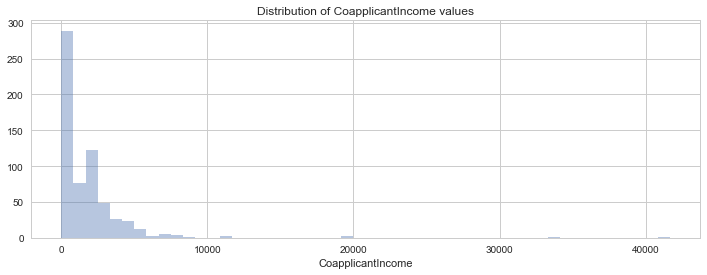

In [16]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(training_data['CoapplicantIncome'], kde=False)
plt.title('Distribution of CoapplicantIncome values')
plt.show()

In [17]:
training_data['CoapplicantIncome_log_val'] = np.log(training_data['CoapplicantIncome'])

/Users/Andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/Users/Andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


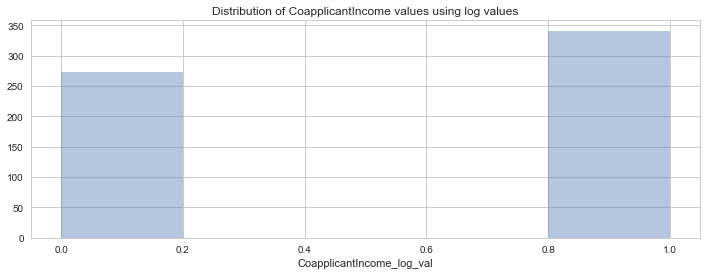

In [18]:
training_data['CoapplicantIncome_log_val'] = np.log(training_data['CoapplicantIncome'])
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(12, 4))
ax = sns.distplot(np.isfinite(training_data['CoapplicantIncome_log_val']), kde=False)
plt.title('Distribution of CoapplicantIncome values using log values')
plt.show()

In [19]:
training_data.min()

Loan_ID                      LP001002
Gender                         Female
Married                            No
Dependents                          0
Education                    Graduate
Self_Employed                      No
ApplicantIncome                   150
CoapplicantIncome                   0
LoanAmount                          9
Loan_Amount_Term                   12
Credit_History                      0
Property_Area                   Rural
Loan_Status                         N
ApplicantIncome_log_val       5.01064
LoanAmount_log_val            2.19722
CoapplicantIncome_log_val        -inf
dtype: object

## Step 4 - Encode data

In [20]:
from sklearn.preprocessing import LabelEncoder

list_of_columns_to_encode = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Credit_History',
    'Loan_Status'
]

le = LabelEncoder()

for column in list_of_columns_to_encode:
    training_data[column] = le.fit_transform(training_data[column])
    
training_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log_val,LoanAmount_log_val,CoapplicantIncome_log_val
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1,8.674026,4.85203,-inf
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,8.430109,4.85203,7.318540


## Step 5 - Build models

In [21]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [24]:
features_for_analysis = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = training_data[features_for_analysis]
loan_status = training_data['Loan_Status']

train_data, test_data, train_labels, test_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

Accuracy of SVC: 0.6891 (+/- 0.0796)
Accuracy of DecisionTreeClassifier: 0.6761 (+/- 0.0418)
Accuracy of KNeighborsClassifier: 0.6239 (+/- 0.0819)
Accuracy of RandomForestClassifier: 0.7630 (+/- 0.0500)
Accuracy of GradientBoostingClassifier: 0.7783 (+/- 0.0494)
Accuracy of GaussianNB: 0.7935 (+/- 0.0392)
Accuracy of LogisticRegression: 0.8065 (+/- 0.0528)


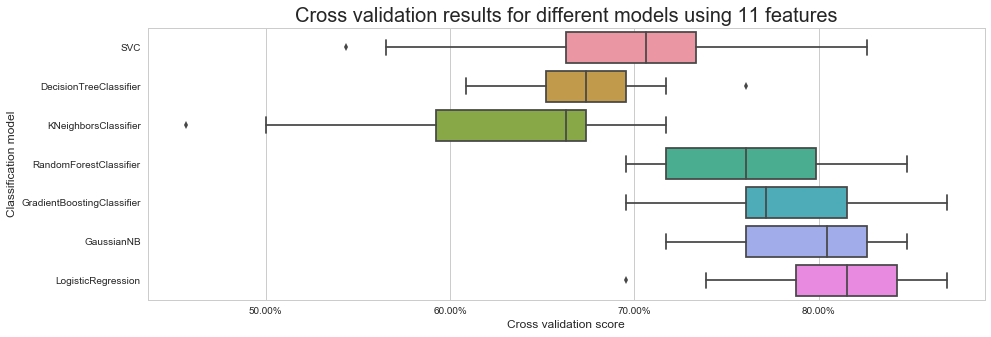

In [27]:
# create list to store data about the performance of each model
results = []

# create list to store names of all models
names = []

# create list of models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

# iterate through list of models and run cross validation 10 times and store accuracy values
for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    names.append(classifier_name)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

# create box plot showing cross validation results
fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for different models using 11 features', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.show()

In [29]:
features_for_analysis = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'ApplicantIncome_log_val',
    'CoapplicantIncome',
    'LoanAmount_log_val',
    'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = training_data[features_for_analysis]
loan_status = training_data['Loan_Status']

train_data, test_data, train_labels, test_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

Accuracy of SVC: 0.7435 (+/- 0.0613)
Accuracy of DecisionTreeClassifier: 0.6891 (+/- 0.0401)
Accuracy of KNeighborsClassifier: 0.6696 (+/- 0.0494)
Accuracy of RandomForestClassifier: 0.7609 (+/- 0.0424)
Accuracy of GradientBoostingClassifier: 0.7848 (+/- 0.0519)
Accuracy of GaussianNB: 0.7978 (+/- 0.0364)
Accuracy of LogisticRegression: 0.8109 (+/- 0.0506)


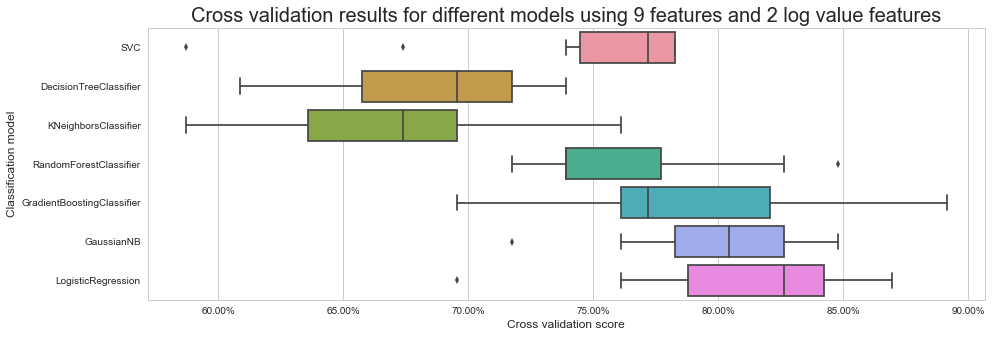

In [30]:
# create list to store data about the performance of each model
results = []

# create list to store names of all models
names = []

# create list of models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

# iterate through list of models and run cross validation 10 times and store accuracy values
for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    names.append(classifier_name)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

# create box plot showing cross validation results
fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for different models using 9 features and 2 log value features', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.show()

Accuracy of SVC: 0.7717 (+/- 0.0601)
Accuracy of DecisionTreeClassifier: 0.6913 (+/- 0.0454)
Accuracy of KNeighborsClassifier: 0.7587 (+/- 0.0554)
Accuracy of RandomForestClassifier: 0.7391 (+/- 0.0575)
Accuracy of GradientBoostingClassifier: 0.7739 (+/- 0.0448)
Accuracy of GaussianNB: 0.8065 (+/- 0.0471)
Accuracy of LogisticRegression: 0.8109 (+/- 0.0506)


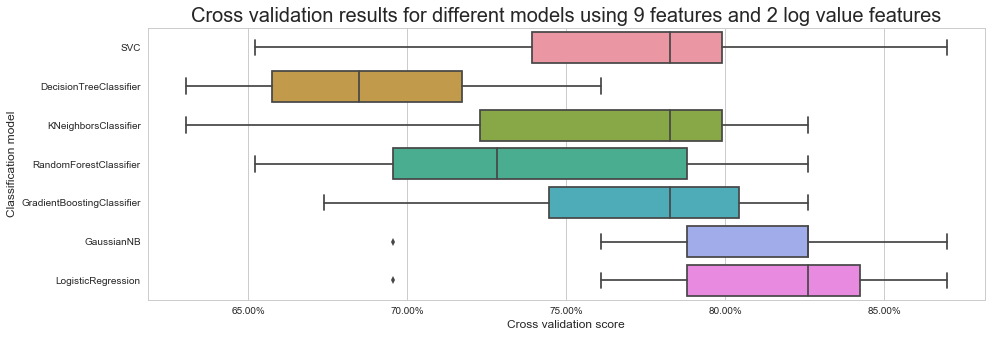

In [31]:
features_for_analysis = [
    'Gender',
#     'Married',
#     'Dependents',
#     'Education',
#     'Self_Employed',
    'ApplicantIncome_log_val',
#     'CoapplicantIncome',
    'LoanAmount_log_val',
    'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = training_data[features_for_analysis]
loan_status = training_data['Loan_Status']

train_data, test_data, train_labels, test_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

# create list to store data about the performance of each model
results = []

# create list to store names of all models
names = []

# create list of models
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

# iterate through list of models and run cross validation 10 times and store accuracy values
for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    names.append(classifier_name)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

# create box plot showing cross validation results
fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for different models using 9 features and 2 log value features', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.show()